<a href="https://colab.research.google.com/github/karthisha-13/AIML_2303A52099/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# logistic regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/bd_students_per.csv")
print(data.head())

   id         full_name  age  gender location  family_size mother_education  \
0   2        Avi Biswas   16    Male    Urban            6              SSC   
1   3   Taslima Sultana   18  Female    Rural            6              SSC   
2   4  Md Adilur Rahman   15    Male    Rural            4              SSC   
3   5       Saleh Ahmed   16    Male    Rural            6              SSC   
4   6         Din Islam   17    Male    Urban            5           Honors   

  father_education mother_job father_job  ... tutoring school_type attendance  \
0              HSC         No         No  ...      Yes     Private         95   
1              HSC         No        Yes  ...       No   Semi_Govt         92   
2              SSC        Yes        Yes  ...      Yes        Govt         81   
3              SSC        Yes        Yes  ...      Yes     Private         90   
4          Masters         No        Yes  ...      Yes   Semi_Govt         75   

   extra_curricular_activities english

In [5]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

X = data[['age', 'family_size', 'mother_education', 'father_education']]  # Example features
y = data['gender']

In [6]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement logistic regression

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Calculate and interpret the confusion matrix.


In [8]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print(f'True Positives: {TP}, True Negatives: {TN}, False Positives: {FP}, False Negatives: {FN}')

Confusion Matrix:
 [[820 447]
 [843 474]]
True Positives: 474, True Negatives: 820, False Positives: 447, False Negatives: 843


# Evaluate the model using accuracy and F1-score.

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.50
F1 Score: 0.42


# Visualize the decision boundary of the logistic regression model.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


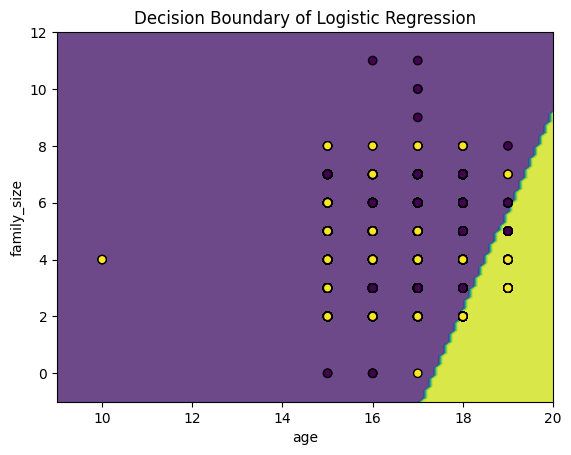

In [11]:
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]
model_2d = LogisticRegression(max_iter=1000)
model_2d.fit(X_train_2d, y_train)
xx, yy = np.meshgrid(np.linspace(X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1, 100))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', marker='o')
plt.xlabel(X_train_2d.columns[0])
plt.ylabel(X_train_2d.columns[1])
plt.title('Decision Boundary of Logistic Regression')
plt.show()

# Implement regularization (L1 or L2) and evaluate the model performance

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model_l2 = LogisticRegression(penalty='l2', max_iter=1000)
model_l2.fit(X_train, y_train)

y_pred_l2 = model_l2.predict(X_test)

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f'Accuracy with L2 Regularization: {accuracy_l2:.2f}')
print(f'F1 Score with L2 Regularization: {f1_l2:.2f}')

model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

y_pred_l1 = model_l1.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print(f'Accuracy with L1 Regularization: {accuracy_l1:.2f}')
print(f'F1 Score with L1 Regularization: {f1_l1:.2f}')

Accuracy with L2 Regularization: 0.50
F1 Score with L2 Regularization: 0.42
Accuracy with L1 Regularization: 0.50
F1 Score with L1 Regularization: 0.42
